# Analysis of the results for the Ximantis dataset
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

## Results

In [2]:
result = torch.tensor(np.load("STGAN/ximantis_smooth/result/result.npy"), dtype=torch.float)

In [3]:
result.shape

torch.Size([1728, 42, 3])

In [4]:
camera_num = 19
feature_num = 0
timestamp = 12
day_length = 24 * timestamp
days = 1

<Axes: >

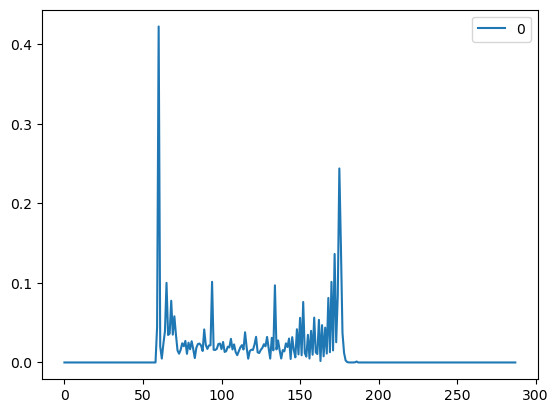

In [5]:
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

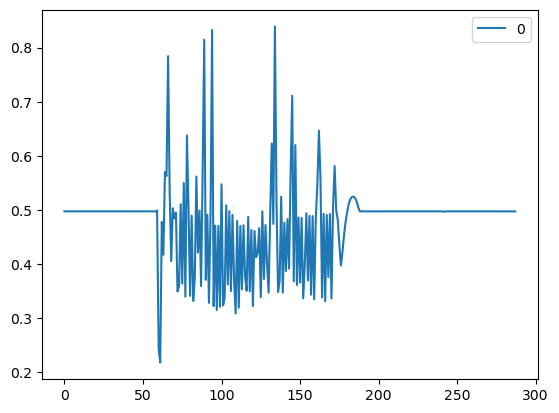

In [6]:
feature_num = 1
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

<Axes: >

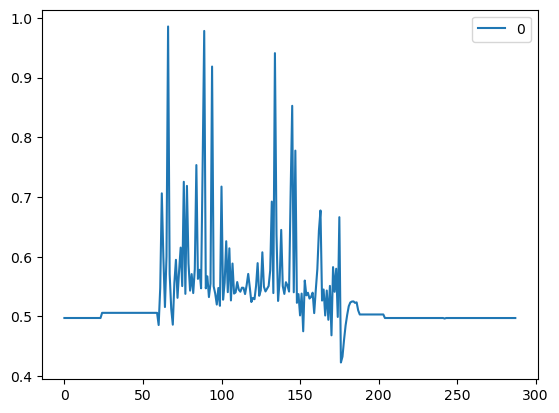

In [7]:
feature_num = 2
pd.DataFrame(result[:days*day_length, camera_num, feature_num].numpy()).plot()

## Anomaly score
Combining the two scores, from the generator and the discriminator.

In [8]:
s_G = pd.DataFrame(result[:days*day_length, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:days*day_length, camera_num, 1].numpy()) - pd.DataFrame(result[:days*day_length, camera_num, 2].numpy())

In [9]:
lambda_coef = 1.0
anomaly_score = s_G + lambda_coef * s_D
anomaly_score.columns = ["Score"]


In [10]:
anomaly_score

,Score
0,-0.00014
1,-0.00014
2,-0.00014
3,-0.00014
4,-0.00014
...,...
283,-0.00009
284,-0.00009
285,-0.00009
286,-0.00009


<Axes: >

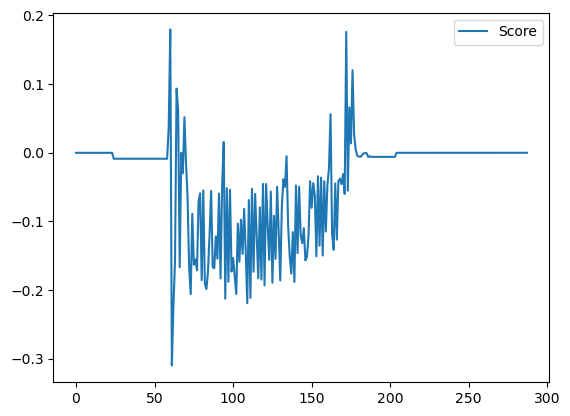

In [11]:
anomaly_score.plot()

In [12]:
anomaly_threshold = .75
anomalies = anomaly_score[anomaly_score.Score > anomaly_threshold].index
anomalies

Int64Index([], dtype='int64')

## Real data

In [13]:
data = torch.tensor(np.load("STGAN/ximantis_smooth/data/data.npy"), dtype=torch.float)
data.shape

torch.Size([5184, 42, 1, 1])

In [14]:
train_time = 12
df = pd.DataFrame(data[train_time*day_length:(train_time+days)*day_length, camera_num, 0, 0])
df.columns = ["Flow"]

<Axes: >

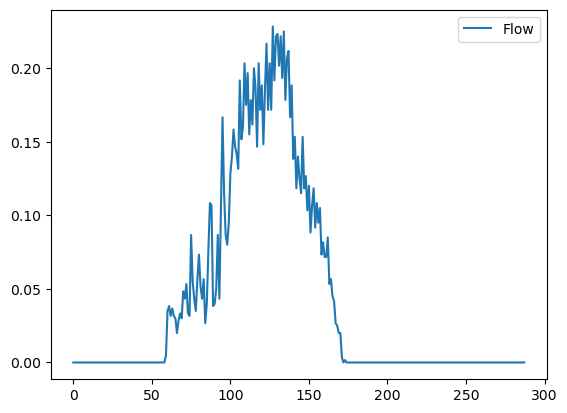

In [15]:
df.plot()

In [16]:
anomalies

Int64Index([], dtype='int64')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


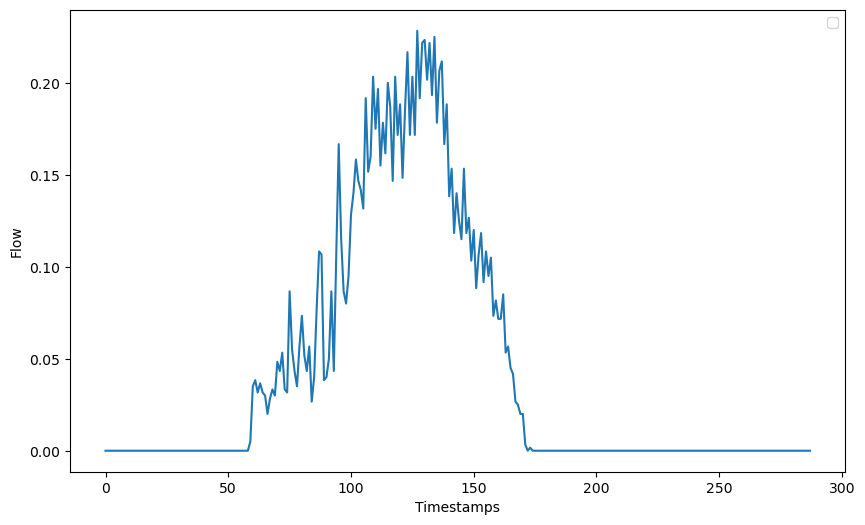

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(anomalies):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.legend()
plt.show()

## Anomaly scores from all the cameras

In [18]:
lambda_coef = 1.0
camera_num = 0
s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
column_name = "ScoreCamera" + str(camera_num)
anomaly_score = pd.DataFrame([], columns=[column_name])
anomaly_score[column_name] = s_G + lambda_coef * s_D

In [19]:
camera_num = 1
s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
column_name = "ScoreCamera" + str(camera_num)
anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

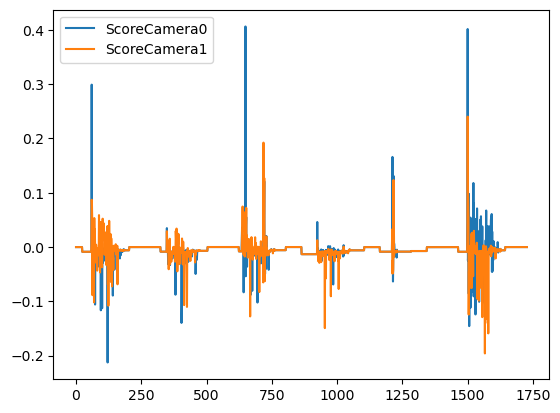

In [20]:
anomaly_score.plot()


In [21]:
lambda_coef = 1.0
for camera_num in range(result.shape[1]):
    column_name = "ScoreCamera" + str(camera_num)
    if camera_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
    s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

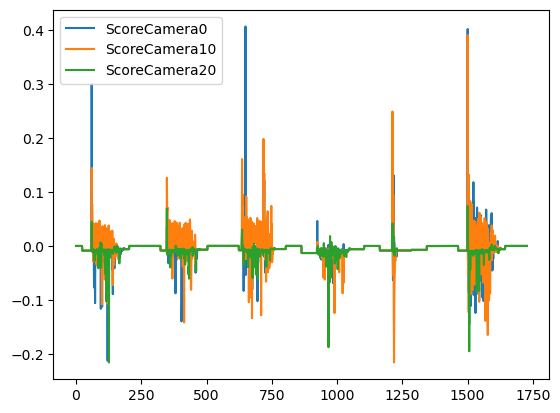

In [22]:
anomaly_score[["ScoreCamera0", "ScoreCamera10", "ScoreCamera20"]].plot()

In [23]:
anomaly_score

,ScoreCamera0,ScoreCamera1,ScoreCamera2,ScoreCamera3,ScoreCamera4,ScoreCamera5,ScoreCamera6,ScoreCamera7,ScoreCamera8,ScoreCamera9,...,ScoreCamera32,ScoreCamera33,ScoreCamera34,ScoreCamera35,ScoreCamera36,ScoreCamera37,ScoreCamera38,ScoreCamera39,ScoreCamera40,ScoreCamera41
0,-0.00014,-0.000140,-0.000140,-0.000140,-0.000140,-0.000140,-0.000141,-0.00014,-0.00014,-0.000140,...,-0.000140,-0.00014,-0.00014,-0.000140,-0.000140,-0.000140,-0.00014,-0.000140,-0.00014,-0.000141
1,-0.00014,-0.000141,-0.000140,-0.000140,-0.000140,-0.000141,-0.000141,-0.00014,-0.00014,-0.000140,...,-0.000140,-0.00014,-0.00014,-0.000141,-0.000140,-0.000141,-0.00014,-0.000141,-0.00014,-0.000140
2,-0.00014,-0.000140,-0.000140,-0.000140,-0.000140,-0.000140,-0.000140,-0.00014,-0.00014,-0.000140,...,-0.000140,-0.00014,-0.00014,-0.000140,-0.000141,-0.000140,-0.00014,-0.000140,-0.00014,-0.000140
3,-0.00014,-0.000140,-0.000140,-0.000141,-0.000140,-0.000140,-0.000140,-0.00014,-0.00014,-0.000140,...,-0.000140,-0.00014,-0.00014,-0.000140,-0.000141,-0.000140,-0.00014,-0.000140,-0.00014,-0.000140
4,-0.00014,-0.000140,-0.000141,-0.000140,-0.000140,-0.000140,-0.000140,-0.00014,-0.00014,-0.000140,...,-0.000140,-0.00014,-0.00014,-0.000140,-0.000140,-0.000140,-0.00014,-0.000140,-0.00014,-0.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,-0.00009,-0.000090,-0.000090,-0.000090,-0.000090,-0.000089,-0.000090,-0.00009,-0.00009,-0.000090,...,-0.000090,-0.00009,-0.00009,-0.000090,-0.000090,-0.000089,-0.00009,-0.000090,-0.00009,-0.000090
1724,-0.00009,-0.000090,-0.000090,-0.000090,-0.000089,-0.000090,-0.000090,-0.00009,-0.00009,-0.000090,...,-0.000090,-0.00009,-0.00009,-0.000089,-0.000090,-0.000089,-0.00009,-0.000090,-0.00009,-0.000090
1725,-0.00009,-0.000090,-0.000089,-0.000090,-0.000090,-0.000090,-0.000090,-0.00009,-0.00009,-0.000090,...,-0.000089,-0.00009,-0.00009,-0.000090,-0.000090,-0.000090,-0.00009,-0.000090,-0.00009,-0.000090
1726,-0.00009,-0.000090,-0.000090,-0.000090,-0.000090,-0.000090,-0.000090,-0.00009,-0.00009,-0.000089,...,-0.000090,-0.00009,-0.00009,-0.000089,-0.000089,-0.000090,-0.00009,-0.000090,-0.00009,-0.000090


## Selecting the top K% anomaly scores

In [24]:
K = 0.00004

In [25]:
anomaly_score_flattened = pd.Series([], dtype=float)
for i, col in enumerate(anomaly_score.columns):
    anomaly_score_flattened = pd.concat([anomaly_score_flattened, anomaly_score[col]], ignore_index=True)
anomaly_score_flattened

0       -0.00014
1       -0.00014
2       -0.00014
3       -0.00014
4       -0.00014
          ...   
72571   -0.00009
72572   -0.00009
72573   -0.00009
72574   -0.00009
72575   -0.00009
Length: 72576, dtype: float32

In [26]:
top = int(np.floor(K * len(anomaly_score_flattened)))

<Axes: >

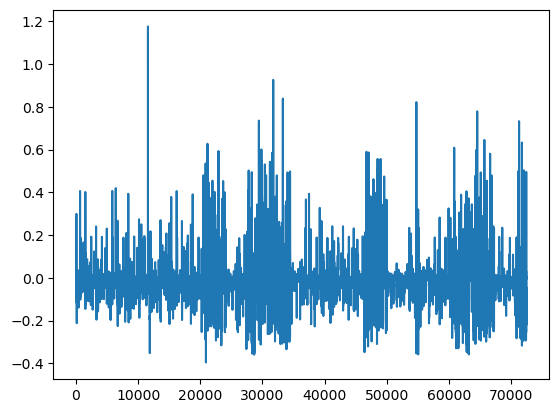

In [27]:
anomaly_score_flattened.plot()

In [28]:
anomalies = anomaly_score_flattened.sort_values(ascending=False)[:top].index
anomalies

Int64Index([11580, 31740], dtype='int64')

## Plotting the anomalies for a specific camera

In [29]:
camera_nums, minutes = divmod(anomalies,result.shape[0])

In [30]:
camera_nums

Int64Index([6, 18], dtype='int64')

In [31]:
minutes

Int64Index([1212, 636], dtype='int64')

In [32]:
# Choose the camera
camera_num = 6

In [33]:
minutes[camera_nums == camera_num]

Int64Index([1212], dtype='int64')

In [34]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/ximantis_smooth/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
df.columns = ["Flow"]

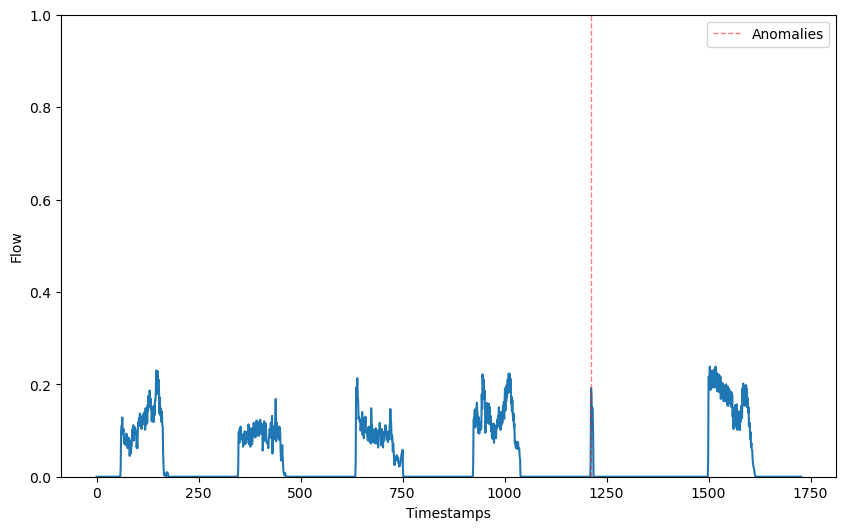

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(minutes[camera_nums == camera_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.ylim([0,1])
plt.legend()
plt.show()

### Creating a function

In [36]:
def plot_anomalies(camera_num, K=0.00004, anomaly_score=anomaly_score, train_time=12):
    anomaly_score_flattened = pd.Series([], dtype=float)
    for i, col in enumerate(anomaly_score.columns):
        anomaly_score_flattened = pd.concat([anomaly_score_flattened, anomaly_score[col]], ignore_index=True)
    top = int(np.floor(K * len(anomaly_score_flattened)))
    anomalies = anomaly_score_flattened.sort_values(ascending=False)[:top].index
    camera_nums, minutes = divmod(anomalies, anomaly_score.shape[0])
    data = torch.tensor(np.load("STGAN/ximantis_smooth/data/data.npy"), dtype=torch.float)
    df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
    plt.figure(figsize=(10, 6))
    plt.plot(df)

    for i, time in enumerate(minutes[camera_nums == camera_num]):
        if i == 0:
            plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
        else:
            plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


    plt.xlabel("Timestamps")
    plt.ylabel("Flow")
    plt.ylim([0,1])
    plt.legend()
    plt.show()

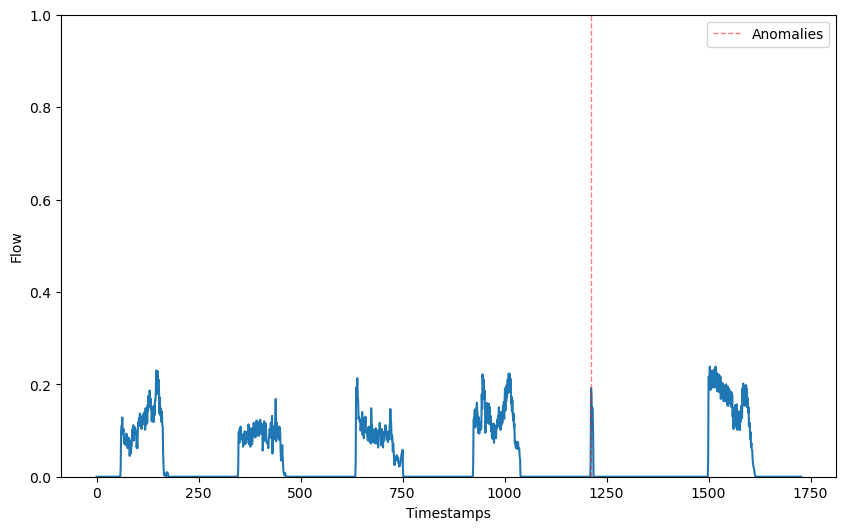

In [37]:
plot_anomalies(camera_num, K, anomaly_score, train_time)

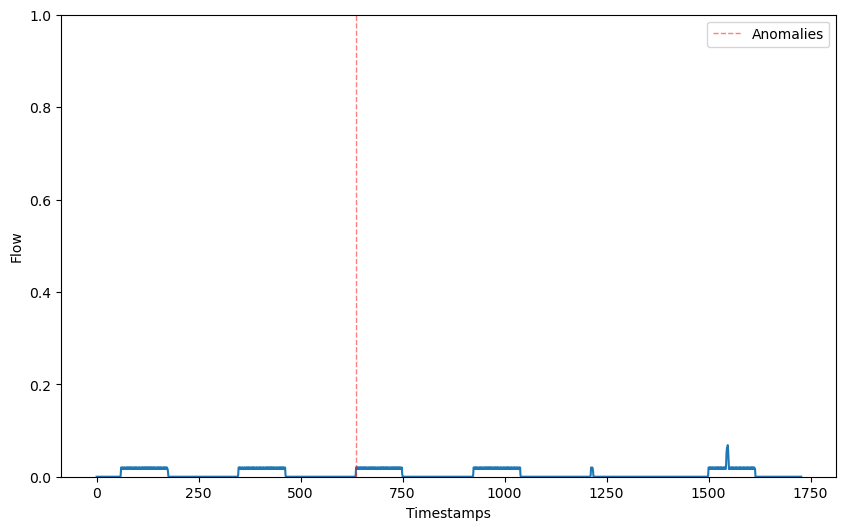

In [38]:
plot_anomalies(camera_num=18)